In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 1) 누락된 데이터가 있는지 확인!!!!!!
for col in data.columns:
    print(str(col)+":", data[col].isnull().sum()/len(data))

PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 0.19865319865319866
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 0.7710437710437711
Embarked: 0.002244668911335578


In [5]:
# 빵구난 데이터 중에서 Age에 대해서 고민해보자

<AxesSubplot:ylabel='Frequency'>

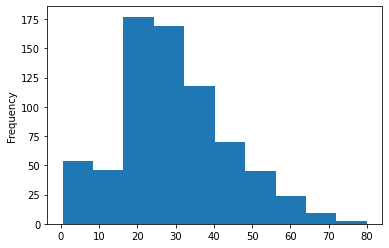

In [6]:
data["Age"].plot(kind="hist")

In [7]:
# Age 데이터 중에서 20% 정도가 누락
# 그냥 제거를 해버리기엔 좀 많이 누락되었다
# 채우자! --> 어떻게?
# 일단 가장 노멀하게 평균 대표값으로 채운다

In [8]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [9]:
# 다 채워졌는지 확인한다
data["Age"].isnull().sum()

0

In [10]:
# Cabin컬럼, Embarked컬럼에 대해서도 처리를 해야합니다...
# 문자열의 값으로 누락되어 있는 변수들!!!!
# ---> 새로운 문자열로 채운다!!!(N)

In [11]:
data["Embarked"].fillna("N", inplace=True)

In [12]:
data["Cabin"].fillna("N", inplace=True)

In [13]:
data.isnull().sum().sum()

0

In [14]:
# 빵구난 데이터가 다 없어졌는지 체크
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 2) 빵구난 데이터는 처리가 되었으니, 이제는
#    학습을 위한 숫자로 변환!!!!! ---> 인코딩!!!

In [ ]:
# 인코딩 : 라벨인코딩 vs 원핫인코딩

# 성별 : 남자, 연자 //초등,중등,고등
# --> 라벨인코딩 : 항목의 종류에 따라서 숫자를 부여
# 남자 :0, 여자 : 1 // 초등0, 중등1, 고등2
# 컬럼의 수는 그대로!!!! 다만 값만 숫자로...

# 남자 ,여자 ------> 원핫인코딩 ----> 남자냐,    여자냐
# 남자                                  1           0
# 여자                                  0           1
# --> 종류가 늘어나면 컬러의 수가 증가!!!!
#     데이터의 크기가 증가를 하는데,,,대부분의 영역이 0 :sparse
#     너무 종류가 많으면 차원이 엄청 증가할 수 있다!!!!

In [15]:
# 예) 
from sklearn.preprocessing import LabelEncoder

In [16]:
items = ["TV","냉장고","세탁기","TV","냉장고"]
label_enc = LabelEncoder()
label_enc.fit(items)
label_items = label_enc.transform(items)
label_items

array([0, 1, 2, 0, 1])

In [17]:
label_enc.classes_

array(['TV', '냉장고', '세탁기'], dtype='<U3')

In [18]:
# test 셋에는 전혀 train에 없는 값이 나타날 수 있음!!!
# unseen data 문제 : 커피포트
test_items = ["TV","냉장고","커피포트","냉장고"]
test_items

['TV', '냉장고', '커피포트', '냉장고']

In [19]:
label_enc.transform(test_items)

ValueError: y contains previously unseen labels: '커피포트'

In [ ]:
# 그러면 이렇게 새로운 값들이 나타나면 어떻게 하지;;;;;?????

In [20]:
# 1) 기존 변환률에 대한 종류를 리스트업하고, 갱신!!!
prev_class = list(label_enc.classes_)
# 2) unseen data가 나타나면 classes에 추가...
for label in np.unique(test_items):
    if label not in prev_class:
        prev_class.append(label) # <- 뒤로 새로운 값을 추가
# 왜냐 앞으로 넣으면 기존의 0이 TV인데, 0 커피포트로 혼선!!!!
# 3) 기존의 값과 새로 나타난 것을 합쳐서...
label_enc.classes_ = np.array(prev_class)
label_enc.transform(test_items)

array([0, 1, 3, 1])

In [21]:
# 원핫인코딩~~~
# scikit-learn에서는 1단계) 라벨인코딩 --> 2단계) 원핫인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# 원핫인코딩을 하기 위해서는 위의 2개 라벨인코더/원핫인코더 모두 필요..

In [22]:
# 1단계) 라벨인코딩을 먼저 수행
label_enc = LabelEncoder()
label_enc.fit(items)
label_items = label_enc.transform(items)
print("라벨인코딩결과:", label_items)
# 2단계 원핫인코딩 : 1단계 결과를 가지고...
oh_enc = OneHotEncoder()
oh_label_items = label_items.reshape(-1,1) # <- DL : Shape 변경
oh_label_labels = oh_enc.fit_transform(oh_label_items)
oh_label_labels

라벨인코딩결과: [0 1 2 0 1]


<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
oh_label_labels.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [24]:
label_items.reshape(-1,1)

array([[0],
       [1],
       [2],
       [0],
       [1]])

In [ ]:
# scaling 관련
# min/max, standarScler

In [ ]:
### 전처리들에 대한 함수화!!!!---> scikit-learn pieline
#  함수로 만들면,,,,함수만 수정.

In [ ]:
# 1) 전처리 : 인코딩을 부분을 함수
#    입력 : DF전체를 받아서.
#    수행 : 내가 원하는 커럶에 인코딩
#    출력 : 인코딩이 된 DF

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
def encode_feature(df):
    # cabin : 너무 종류가 많습니다 --> 앞자리 1개만 
    df.loc[:, "Cabin"] = df.loc[:, "Cabin"].apply(lambda x: str(x)[:1])
    # 인코딩을 하려는 컬럼을 리스트업
    features = ["Cabin","Sex","Embarked"]
    # 위의 컬럼들을 인코딩....
    for f in features:
        le = LabelEncoder()
        le.fit(df.loc[:,f])
        df.loc[:,f] = le.transform(df.loc[:,f])
    return df

In [27]:
# 2) 빵구난데이터들에 대한 체크 함수
# Age, Cabin, Embarked, Fare
# 입력: df ---> 누락처리 --> 출력:df
def check_fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N",inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

In [28]:
# 불필요한 컬럼 제거 함수
# df--> 컬럼제거 --> df
def drop_features(df):
    df.drop(["PassengerId", "Name","Ticket"], axis=1, inplace=True)
    return df

In [29]:
#### 전처리를 함수화를 프로세스로..
def titanic_preprocess(df):
    df = check_fillna(df)
    df = drop_features(df)
    df = encode_feature(df)
    return df
#######

In [ ]:
#############################################

In [31]:
path = "./data/train.csv"
data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# 정답지와 문제지를 분리!!!!
y_titanic = data.loc[:, "Survived"]
X_titanic = data.drop("Survived", axis = 1)
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [33]:
X_titanic = titanic_preprocess(X_titanic)
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [ ]:
### train을 가지고 자체적으로 검증을 위해서 셋을 분리
#  test---> validation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y_titanic.value_counts()/len(y_titanic)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic,y_titanic, test_size = 0.2, random_state=1234,
    stratify=y_titanic
)

In [37]:
y_train.value_counts()/len(y_train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [38]:
y_test.value_counts()/len(y_test)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [39]:
######## 주어진 train에 대해서 k-fold CV를 하려고 할때 고정!!!

In [ ]:
# 1) 일반적인 K-Fold

In [40]:
from sklearn.model_selection import KFold

In [41]:
kfold = KFold(n_splits=5, random_state=1234, shuffle=True)

In [42]:
for idx, (x_tr, x_val) in enumerate(kfold.split(X_train, y_train)):
    print(str(idx) +"번째 구분: train용 데이터"+str(x_tr[:10])+",검증용"+str(x_val[:10]))

0번째 구분: train용 데이터[ 0  1  2  3  4  5  6  8  9 10],검증용[ 7 11 21 24 28 29 58 60 61 64]
1번째 구분: train용 데이터[ 0  1  2  3  4  5  6  7  9 10],검증용[ 8 13 20 27 34 39 40 44 47 50]
2번째 구분: train용 데이터[ 1  3  4  5  7  8  9 10 11 12],검증용[ 0  2  6 17 19 22 25 33 35 36]
3번째 구분: train용 데이터[ 0  1  2  3  4  6  7  8 10 11],검증용[ 5  9 12 16 23 31 32 42 48 49]
4번째 구분: train용 데이터[ 0  2  5  6  7  8  9 11 12 13],검증용[ 1  3  4 10 14 15 18 26 30 41]


In [43]:
for idx, (x_tr, x_val) in enumerate(kfold.split(X_train, y_train)):
    print(y_train.iloc[x_val].value_counts(normalize=True))
    print("----")

0    0.643357
1    0.356643
Name: Survived, dtype: float64
----
0    0.58042
1    0.41958
Name: Survived, dtype: float64
----
0    0.647887
1    0.352113
Name: Survived, dtype: float64
----
0    0.605634
1    0.394366
Name: Survived, dtype: float64
----
0    0.605634
1    0.394366
Name: Survived, dtype: float64
----


In [46]:
# 2) Stratified K-Fold

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
str_kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

In [49]:
for idx, (x_tr, x_val) in enumerate(str_kfold.split(X_train, y_train)):
    print(y_train.iloc[x_val].value_counts(normalize=True))
    print("----")

0    0.615385
1    0.384615
Name: Survived, dtype: float64
----
0    0.615385
1    0.384615
Name: Survived, dtype: float64
----
0    0.619718
1    0.380282
Name: Survived, dtype: float64
----
0    0.619718
1    0.380282
Name: Survived, dtype: float64
----
0    0.612676
1    0.387324
Name: Survived, dtype: float64
----


In [50]:
# 3) reopeated K-Fold # --> 데이터가 좀 부족할 때 

In [51]:
from sklearn.model_selection import RepeatedKFold

In [52]:
rkfold = RepeatedKFold(n_splits=5, random_state=1234, n_repeats=10)

In [53]:
# 4) Repeated Stratified K-Fold -> 데이터부족 & 비율!!!

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [55]:
rskfold = RepeatedStratifiedKFold(n_splits=5, random_state=1234, n_repeats=10)

In [56]:
# 오해하지 말아야하는게,,,나눌려는 준비만 한 것임!!!
# -->실제 나누는 것은 cv를 사용한 모듈에서 알아서 진행을 합니다~~~

In [57]:
# knn, svm, rf, xgboost, lightgbm
# --> baseline, HPT(GridSearch/RancomGridSearch)
# ----------- Bayesian HPT : optuna(메뉴얼과 코드 좀 많이 손대야...)

# 여러 모델을 종합해서 하는 voting을 해서 new_model

# (  <- stacking /// regression해볼것 )

# 최종 모델을 선정!!!

In [58]:
# K-Fold 통해서 돌려가면서 모델을 평가 : cross-val
from sklearn.model_selection import cross_val_score
# 평가 : 
from sklearn.metrics import accuracy_score, precision_score, recall_score
# HPT
# gridsearch : 내가 테스트할 파라미터 조합들을 주면 그것들 다 함.100가지
# randomgridsearch : 그 조합들 중에서 random 선택해서 수행 -> 속도적인 빠름
#                    내가 시킨 조합을 다 하지는 않습니다1!!!
# +++ OPTUNA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# -> 장점 : 제일 모델을 바로 불러올 수 있음!!! 재학습X

In [59]:
## 1번 모델 : knn

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_jobs = -1)

In [62]:
# BaseLine을 체크를 하려고 하는데,,cross-val

In [64]:
scores = cross_val_score(knn, 
                         X_train, y_train,
                         cv = kfold, scoring="accuracy")
for iter_count, acc in enumerate(scores):
    print("KNN {0}번째 검증 ACC:{1:.4f}".format(iter_count,acc))
print("KNN 평균 ACC:", scores.mean())

KNN 0번째 검증 ACC:0.7343
KNN 1번째 검증 ACC:0.7063
KNN 2번째 검증 ACC:0.6549
KNN 3번째 검증 ACC:0.6831
KNN 4번째 검증 ACC:0.7817
KNN 평균 ACC: 0.7120555500837191


In [ ]:
# 최소한 0.7X보다는 높도록 모델을 튜닝!!!!===> HPT

In [65]:
# KNN의 메뉴얼을 봤더니 Test할 파라미터는 n_neighbors
# 규칙 : 내가 테스트할 파라미터의 이름을 키, 테스할 값을 values 지정
parametrs = {
    "n_neighbors" : [1,3,5,7,9,11]
}

In [66]:
# RadnomGridSearch를 먼저 사용해서 대략적인 범위가 어딘지 체크
# 1) 사용할 모델
knn = KNeighborsClassifier(n_jobs = -1)
# 2) 몇 번 반복하면서 찾을 것인가? rrandomGridSearch
n_iter_search = 10
# 3) RFSCV세팅
knn_kf_rgs = RandomizedSearchCV(knn,
                                param_distributions=parametrs,
                                cv = kfold,
                                scoring="accuracy",
                                n_jobs = -1 ,
                                random_state= 1234,
                                n_iter = n_iter_search
                                )
# 4) 실질적으로 데이터를 밀어서 RGSCV하기위해서 
knn_kf_rgs.fit(X_train, y_train)

C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11]},
                   random_state=1234, scoring='accuracy')

In [67]:
# 실제 수행한 결과들을
knn_kf_rgs.cv_results_

{'mean_fit_time': array([0.00379944, 0.00357533, 0.00339699, 0.00416374, 0.00344925,
        0.00394158]),
 'std_fit_time': array([0.0004059 , 0.00047495, 0.00033321, 0.00124775, 0.0003158 ,
        0.00018731]),
 'mean_score_time': array([0.02282381, 0.01690044, 0.01505313, 0.0180459 , 0.02341003,
        0.01770253]),
 'std_score_time': array([0.00372278, 0.00235298, 0.00109584, 0.00221315, 0.00506407,
        0.00189278]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.68531469, 0.72027972, 0.73426573, 0.72727273, 0.72027972,
        0.71328671]),
 'split1_test_score': array([0.65734266, 0.70629371, 0.70629371, 0.6993007 , 0.6993007 ,
        0.70629371]),
 'split2_test_score': array(

In [68]:
# 대표적으로 잘 나온 파라미터가 뭐야
knn_kf_rgs.best_params_

{'n_neighbors': 9}

In [69]:
# 제일 잘 나왔을 때 성능? <- 내가 지정한 acc
knn_kf_rgs.best_score_

0.7191273515217178

In [70]:
# 제일 좋았던 모델을 가지오자..
knn_kf_rgs_best = knn_kf_rgs.best_estimator_
knn_kf_rgs_best_ypred =knn_kf_rgs_best.predict(X_test)
knn_kf_rgs_best_acc = accuracy_score(y_test,knn_kf_rgs_best_ypred )
print("KNN-Kfold-RGS-Test Score:",knn_kf_rgs_best_acc)

KNN-Kfold-RGS-Test Score: 0.6871508379888268


In [75]:
### 시간이 여유로워서 더 그 주변을 디테일하게 탐사하려고 할 때
# gridsearch
# 1) 디테일하게 직접 체크할 파라미터들의 조합
parameters = {
    "n_neighbors" : [7,9,11]
}
# 2) 사용할 모델
knn = KNeighborsClassifier(n_jobs = -1)
# 3) 직접 탐사할 세팅 GridSearchCV
knn_kf_gs = GridSearchCV(knn, 
                         param_grid = parameters,
                         cv = kfold, scoring="accuracy",
                         n_jobs=-1)
# 4) 실제 데이터를 넣어서 학습
knn_kf_gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [7, 9, 11]}, scoring='accuracy')

In [76]:
knn_kf_gs.best_score_

0.7191273515217178

In [77]:
knn_kf_gs.best_params_

{'n_neighbors': 9}

In [78]:
# 세로로 조합을 해줘야함
# 세로로 보기
knn_kf_gs.cv_results_

{'mean_fit_time': array([0.00331092, 0.00365076, 0.00370541]),
 'std_fit_time': array([0.00049456, 0.00038126, 0.00037487]),
 'mean_score_time': array([0.0144012 , 0.02004504, 0.01509538]),
 'std_score_time': array([0.00108857, 0.00402759, 0.00208257]),
 'param_n_neighbors': masked_array(data=[7, 9, 11],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}],
 'split0_test_score': array([0.72727273, 0.72027972, 0.71328671]),
 'split1_test_score': array([0.6993007 , 0.6993007 , 0.70629371]),
 'split2_test_score': array([0.67605634, 0.6971831 , 0.70422535]),
 'split3_test_score': array([0.69014085, 0.71126761, 0.70422535]),
 'split4_test_score': array([0.77464789, 0.76760563, 0.74647887]),
 'mean_test_score': array([0.7134837 , 0.71912735, 0.714902  ]),
 'std_test_score': array([0.0348656 , 0.0256433 , 0.01613563]),
 'rank_test_score': array([3, 1, 2])}

In [79]:
# GS의 best모델을 찾아서 평가
knn_kf_gs_best = knn_kf_gs.best_estimator_
knn_kf_gs_ypred = knn_kf_gs_best.predict(X_test)
knn_kf_gs_best_acc = accuracy_score(y_test, knn_kf_gs_ypred)
print("KNN-Kfold-GS-Test:",knn_kf_gs_best_acc )

KNN-Kfold-GS-Test: 0.6871508379888268


In [ ]:
############################ Radnom Forest ###################################

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# BaseLine Check :  Default param -> n_jobs, random_states

In [81]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1234)
scores = cross_val_score(rf, 
                         X_train, y_train,
                         cv = kfold, scoring="accuracy")
for iter_count, acc in enumerate(scores):
    print("RF {0}번째 검증 ACC:{1:.4f}".format(iter_count,acc))
print("RF 평균 ACC:", scores.mean())

RF 0번째 검증 ACC:0.8112
RF 1번째 검증 ACC:0.8462
RF 2번째 검증 ACC:0.7887
RF 3번째 검증 ACC:0.7606
RF 4번째 검증 ACC:0.8310
RF 평균 ACC: 0.8075248694967005


In [ ]:
# 목적은 RF BaseLine 0.80보다는 더 잘 나오게 HPT
# 일반 RGS

In [85]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1234)
# 1) 파라미터 조합 : RGS -> 좀 범위를 크게크게..
parameters={
    "n_estimators" : [10,50, 100,500],
    "max_features" :["sqrt","log2"],
    "max_depth" :[2, 3,5, 10,30, 50],
    "min_samples_split":[2, 4,6, 10,30],
    "min_samples_leaf":[1, 2,3,5, 10]
}
# 2) RGS 몇 번 반복할 것이냐.
n_iter_search = 10
# 3) RGSCV세팅
rf_kf_rgs = RandomizedSearchCV(rf,
                                param_distributions=parameters,
                                cv = kfold,
                                scoring="accuracy",
                                n_jobs = -1 ,
                                random_state= 1234,
                                n_iter = n_iter_search
                                )
# 4) 실질적으로 데이터를 밀어서 RGSCV하기위해서 
rf_kf_rgs.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=1234),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 4, 6, 10, 30],
                                        'n_estimators': [10, 50, 100, 500]},
                   random_state=1234, scoring='accuracy')

In [86]:
rf_kf_rgs.cv_results_

{'mean_fit_time': array([0.84192395, 0.99467382, 0.10688844, 0.02901216, 0.09085903,
        0.90405922, 0.26398749, 0.2112412 , 0.19988503, 0.18649068]),
 'std_fit_time': array([0.00542983, 0.14871506, 0.00705898, 0.00480488, 0.00823028,
        0.03826719, 0.10653529, 0.03093842, 0.02735625, 0.03045811]),
 'mean_score_time': array([0.10924649, 0.13221884, 0.0214736 , 0.01018605, 0.01510615,
        0.08776498, 0.03062873, 0.02450395, 0.02452374, 0.0171102 ]),
 'std_score_time': array([0.01012333, 0.04394947, 0.00242898, 0.00049356, 0.00056982,
        0.00746828, 0.00710907, 0.00278551, 0.00184734, 0.0026582 ]),
 'param_n_estimators': masked_array(data=[500, 500, 50, 10, 50, 500, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 2, 30, 4, 6, 30, 30, 6, 2, 2],
              mask=[False, False, False, Fa

In [87]:
rf_kf_rgs.best_score_

0.8257756328178862

In [88]:
rf_kf_rgs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5}

In [89]:
# 지금 상태의 성능?
rf_kf_rgs_best = rf_kf_rgs.best_estimator_
rf_kf_rgs_best_ypred = rf_kf_rgs_best.predict(X_test)
rf_kf_rgs_best_acc = accuracy_score(y_test,rf_kf_rgs_best_ypred )
print("RF-Kfold-RGS-Acc:", rf_kf_rgs_best_acc)

RF-Kfold-RGS-Acc: 0.8044692737430168


In [90]:
rf_kf_rgs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5}

In [97]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1234)

parameters={
    "n_estimators" : [90, 100, 110, 300],
    "max_features" :["sqrt","log2"],
    "max_depth" :[4, 5, 6],
    "min_samples_split":[1, 2, 3, 4],
    "min_samples_leaf":[1, 2, 3, 4, 5]
}# 4 * 2* 3 * 4 * 5  = 4800??

# 2) RGSCV세팅
rf_kf_gs = GridSearchCV(rf,
                        param_grid=parameters,
                        cv = kfold,
                        scoring="accuracy",
                        n_jobs = -1
                        )
# 3) 실질적으로 데이터를 밀어서 RGSCV하기위해서 
rf_kf_gs.fit(X_train, y_train)

C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\NTX550\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\NTX550\anaconda3\lib\site-packages\joblib\parallel

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [90, 100, 110, 300]},
             scoring='accuracy')

In [98]:
rf_kf_gs.best_score_

0.8342558849601105

In [99]:
rf_kf_gs.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [100]:
rf_kf_gs_best = rf_kf_gs.best_estimator_
rf_kf_gs_best_ypred = rf_kf_gs_best.predict(X_test)
rf_kf_gs_best_ypred_acc = accuracy_score(y_test, rf_kf_gs_best_ypred)
print("RF_Kfold-GS-Acc", rf_kf_gs_best_ypred_acc)

RF_Kfold-GS-Acc 0.8100558659217877


In [101]:
rf_kf_rgs_best_acc

0.8044692737430168

In [102]:
###### 만든 모델에 대한 저장하고 불러오는 것들 ####
###### Model Save & Load #####

In [103]:
import joblib

In [105]:
# 모델 저장)
# 파이썬에서는 pickle 입으로 저장을 합니다.
# joblib.dump
joblib.dump(rf_kf_gs_best, "rf_model_kf_gs_best.pkl")

['rf_model_kf_gs_best.pkl']

In [107]:
# 모델을 불러오기...
model_path = "./rf_model_kf_gs_best.pkl"
rf_kfold_backup = joblib.load(model_path)

In [108]:
rf_kfold_backup.predict(X_test) ==rf_kf_gs_best.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Xgboost

In [ ]:
##################### Xgboost #####

In [109]:
from xgboost import XGBClassifier
# colab은 설치가 되어 있고, local에서 하시려면 설치가 있어야 함!!!!

In [111]:
xgbc = XGBClassifier(n_jobs = -1, random_state=1234, use_label_encoder=False)

In [112]:
# xgboost Clf로 BaseLine

In [113]:
scores = cross_val_score(xgbc, 
                         X_train, y_train,
                         cv = kfold, scoring="accuracy")
for iter_count, acc in enumerate(scores):
    print("XGB {0}번째 검증 ACC:{1:.4f}".format(iter_count,acc))
print("XGB 평균 ACC:", scores.mean())

C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a fu

[13:45:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
# 아무것도 안 해도 xgboost를 사용하면 baseline : 0.81~0.82
# ---> 부스팅같은 경우는 데이터의 수가 아주 많지않으면.
#       baseline에서 크게 향상이 거의 없습니다!!!!
#       kfold : repeated 계열로 펌핑하고 해보던가...너무 힘을 안쓰던가..
#       HPT 의한 성능향상이 아주~~크지 않을듯....경향....

In [ ]:
# xgb에서 RGS를 통해서 대략적인 범위를 찾아보자~~~

In [114]:
xgbc = XGBClassifier(
    n_jobs = -1, random_state=1234, use_label_encoder=False,
    # 학습관련된 부분을 설정.
    objective = "binary:logistic",
    eval_metric  =" error")

In [118]:
# RGS - XGBparameter
parameters = {
    "booster": ["gbtree"],

    # 몇 개의 모델을 만들어서 이어달리기를 할지..
    "n_estimators" : [10, 50, 100, 300, 500],
    # 조금씩 이동하면서 에러 보상할까, 크게 크게 움직이면서 에러 보상..
    "learning_rate":[0.01, 0.1, 0.3,0.8],

    # Tree모형에 대한 조절
    "max_depth":[2, 4, 6, 8, 10, 20],
    "min_child_weight":[0.5, 1, 1.5],
    "gamma":[0, 0.1, 0.5], 

    # 샘플링쪽 컨트롤
    "subsample":[0.3, 0.5, 0.7, 0.9],
    "colsample_bytree":[0.3, 0.5, 0.7, 0.9],

    # 부스팅자체가 overfit--> 규약
    "reg_alpha":[0, 0.01, 0.1, 0.5, 1, 10],
    "reg_lambda":[0, 0.01, 0.1, 0.5, 1, 10]
}
n_iter_search = 10
xgb_kf_rgs = RandomizedSearchCV(xgbc,
                                param_distributions=parameters,
                                cv = kfold,
                                scoring="accuracy",
                                n_jobs = -1 ,
                                random_state= 1234,
                                n_iter = n_iter_search
                                )
# 4) 실질적으로 데이터를 밀어서 RGSCV하기위해서 
xgb_kf_rgs.fit(X_train, y_train)

C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NTX550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "C:\Users\NTX550\anaconda3\lib\site-packages\xgboost\training.py", li

XGBoostError: [14:24:28] ..\src\metric\metric.cc:49: Unknown metric function  error